# Demo: Bayesian Logistic Regression

Set up format rules;

In [1]:
/*--------------------------------------------------*/
/* SAS Programming for R Users - code for exercises */
/* Copyright 2016 SAS Institute Inc.                */
/*--------------------------------------------------*/

/*SP4R01d01*/

/******************************
Introduction
******************************/

proc format;
    value yesnofmt
        0="No"
        1="Yes";
    value ftvfmt
        0="0"
        1="1"
        2-high="2+";
    value ptlfmt
        0="0"
        1-high="1+";
run;


Reading Data in from datalines using `Data` procedure, label and reclassify variables accordingly. 

In [2]:
/*
LIST OF VARIABLES:

Columns    Variable                                              Abbreviation
-----------------------------------------------------------------------------
2-4        Identification Code                                     ID
 
10         Low Birth Weight (0 = Birth Weight >= 2500g,            LOW
                           1 = Birth Weight < 2500g)

17-18      Age of the Mother in Years                              AGE
   
23-25      Weight in Pounds at the Last Menstrual Period           LWT
   
32         Ethnicity                                               ETH
   
40         Smoking Status During Pregnancy (1 = Yes, 0 = No)       SMOKE
   
48         History of Premature Labor (0 = None  1 = One, etc.)    PTL
   
55         History of Hypertension (1 = Yes, 0 = No)               HT
   
61         Presence of Uterine Irritability (1 = Yes, 0 = No)      UI
   
67         Number of Physician Visits During the First Trimester   FTV
              (0 = None, 1 = One, 2 = Two, etc.)
   
73-76      Birth Weight in Grams                                   BWT
-----------------------------------------------------------------------------
*/

data work.birth;
    input ID LOW AGE LWT ETH SMOKE PTL HT UI FTV BWT;
    if FTV>2 then FTV=2;
    if PTL>1 then PTL=1;
    label 
        ID="ID Code"
        LOW="Birth Weight < 2500 Grams"
        AGE="Mom's Age"
        LWT="Mom's Weight Last Menstrual Period"
        ETH="Ethnicity"
        SMOKE="Smoking Status"
        PTL="Hx of Premature Labor"
        HT="Hx of Hypertension"
        UI="Hx of Uterine Irritability"
        FTV="MD Visits 1st Trimester"
        BWT="Birth Weight, Grams"
    ;
    format LOW SMOKE HT UI yesnofmt. PTL ptlfmt. ftv ftvfmt.;
    datalines;
  85     0      19    182      2       0       0      0     1     0     2523
  86     0      33    155      3       0       0      0     0     3     2551
  87     0      20    105      1       1       0      0     0     1     2557
  88     0      21    108      1       1       0      0     1     2     2594
  89     0      18    107      1       1       0      0     1     0     2600
  91     0      21    124      3       0       0      0     0     0     2622
  92     0      22    118      1       0       0      0     0     1     2637
  93     0      17    103      3       0       0      0     0     1     2637
  94     0      29    123      1       1       0      0     0     1     2663
  95     0      26    113      1       1       0      0     0     0     2665
  96     0      19     95      3       0       0      0     0     0     2722
  97     0      19    150      3       0       0      0     0     1     2733
  98     0      22     95      3       0       0      1     0     0     2750
  99     0      30    107      3       0       1      0     1     2     2750
 100     0      18    100      1       1       0      0     0     0     2769
 101     0      18    100      1       1       0      0     0     0     2769
 102     0      15     98      2       0       0      0     0     0     2778
 103     0      25    118      1       1       0      0     0     3     2782
 104     0      20    120      3       0       0      0     1     0     2807
 105     0      28    120      1       1       0      0     0     1     2821
 106     0      32    121      3       0       0      0     0     2     2835
 107     0      31    100      1       0       0      0     1     3     2835
 108     0      36    202      1       0       0      0     0     1     2836
 109     0      28    120      3       0       0      0     0     0     2863
 111     0      25    120      3       0       0      0     1     2     2877
 112     0      28    167      1       0       0      0     0     0     2877
 113     0      17    122      1       1       0      0     0     0     2906
 114     0      29    150      1       0       0      0     0     2     2920
 115     0      26    168      2       1       0      0     0     0     2920
 116     0      17    113      2       0       0      0     0     1     2920
 117     0      17    113      2       0       0      0     0     1     2920
 118     0      24     90      1       1       1      0     0     1     2948
 119     0      35    121      2       1       1      0     0     1     2948
 120     0      25    155      1       0       0      0     0     1     2977
 121     0      25    125      2       0       0      0     0     0     2977
 123     0      29    140      1       1       0      0     0     2     2977
 124     0      19    138      1       1       0      0     0     2     2977
 125     0      27    124      1       1       0      0     0     0     2992
 126     0      31    215      1       1       0      0     0     2     3005
 127     0      33    109      1       1       0      0     0     1     3033
 128     0      21    185      2       1       0      0     0     2     3042
 129     0      19    189      1       0       0      0     0     2     3062
 130     0      23    130      2       0       0      0     0     1     3062
 131     0      21    160      1       0       0      0     0     0     3062
 132     0      18     90      1       1       0      0     1     0     3076
 133     0      18     90      1       1       0      0     1     0     3076
 134     0      32    132      1       0       0      0     0     4     3080
 135     0      19    132      3       0       0      0     0     0     3090
 136     0      24    115      1       0       0      0     0     2     3090
 137     0      22     85      3       1       0      0     0     0     3090
 138     0      22    120      1       0       0      1     0     1     3100
 139     0      23    128      3       0       0      0     0     0     3104
 140     0      22    130      1       1       0      0     0     0     3132
 141     0      30     95      1       1       0      0     0     2     3147
 142     0      19    115      3       0       0      0     0     0     3175
 143     0      16    110      3       0       0      0     0     0     3175
 144     0      21    110      3       1       0      0     1     0     3203
 145     0      30    153      3       0       0      0     0     0     3203
 146     0      20    103      3       0       0      0     0     0     3203
 147     0      17    119      3       0       0      0     0     0     3225
 148     0      17    119      3       0       0      0     0     0     3225
 149     0      23    119      3       0       0      0     0     2     3232
 150     0      24    110      3       0       0      0     0     0     3232
 151     0      28    140      1       0       0      0     0     0     3234
 154     0      26    133      3       1       2      0     0     0     3260
 155     0      20    169      3       0       1      0     1     1     3274
 156     0      24    115      3       0       0      0     0     2     3274
 159     0      28    250      3       1       0      0     0     6     3303
 160     0      20    141      1       0       2      0     1     1     3317
 161     0      22    158      2       0       1      0     0     2     3317
 162     0      22    112      1       1       2      0     0     0     3317
 163     0      31    150      3       1       0      0     0     2     3321
 164     0      23    115      3       1       0      0     0     1     3331
 166     0      16    112      2       0       0      0     0     0     3374
 167     0      16    135      1       1       0      0     0     0     3374
 168     0      18    229      2       0       0      0     0     0     3402
 169     0      25    140      1       0       0      0     0     1     3416
 170     0      32    134      1       1       1      0     0     4     3430
 172     0      20    121      2       1       0      0     0     0     3444
 173     0      23    190      1       0       0      0     0     0     3459
 174     0      22    131      1       0       0      0     0     1     3460
 175     0      32    170      1       0       0      0     0     0     3473
 176     0      30    110      3       0       0      0     0     0     3475
 177     0      20    127      3       0       0      0     0     0     3487
 179     0      23    123      3       0       0      0     0     0     3544
 180     0      17    120      3       1       0      0     0     0     3572
 181     0      19    105      3       0       0      0     0     0     3572
 182     0      23    130      1       0       0      0     0     0     3586
 183     0      36    175      1       0       0      0     0     0     3600
 184     0      22    125      1       0       0      0     0     1     3614
 185     0      24    133      1       0       0      0     0     0     3614
 186     0      21    134      3       0       0      0     0     2     3629
 187     0      19    235      1       1       0      1     0     0     3629
 188     0      25     95      1       1       3      0     1     0     3637
 189     0      16    135      1       1       0      0     0     0     3643
 190     0      29    135      1       0       0      0     0     1     3651
 191     0      29    154      1       0       0      0     0     1     3651
 192     0      19    147      1       1       0      0     0     0     3651
 193     0      19    147      1       1       0      0     0     0     3651
 195     0      30    137      1       0       0      0     0     1     3699
 196     0      24    110      1       0       0      0     0     1     3728
 197     0      19    184      1       1       0      1     0     0     3756
 199     0      24    110      3       0       1      0     0     0     3770
 200     0      23    110      1       0       0      0     0     1     3770
 201     0      20    120      3       0       0      0     0     0     3770
 202     0      25    241      2       0       0      1     0     0     3790
 203     0      30    112      1       0       0      0     0     1     3799
 204     0      22    169      1       0       0      0     0     0     3827
 205     0      18    120      1       1       0      0     0     2     3856
 206     0      16    170      2       0       0      0     0     4     3860
 207     0      32    186      1       0       0      0     0     2     3860
 208     0      18    120      3       0       0      0     0     1     3884
 209     0      29    130      1       1       0      0     0     2     3884
 210     0      33    117      1       0       0      0     1     1     3912
 211     0      20    170      1       1       0      0     0     0     3940
 212     0      28    134      3       0       0      0     0     1     3941
 213     0      14    135      1       0       0      0     0     0     3941
 214     0      28    130      3       0       0      0     0     0     3969
 215     0      25    120      1       0       0      0     0     2     3983
 216     0      16     95      3       0       0      0     0     1     3997
 217     0      20    158      1       0       0      0     0     1     3997
 218     0      26    160      3       0       0      0     0     0     4054
 219     0      21    115      1       0       0      0     0     1     4054
 220     0      22    129      1       0       0      0     0     0     4111
 221     0      25    130      1       0       0      0     0     2     4153
 222     0      31    120      1       0       0      0     0     2     4167
 223     0      35    170      1       0       1      0     0     1     4174
 224     0      19    120      1       1       0      0     0     0     4238
 225     0      24    116      1       0       0      0     0     1     4593
 226     0      45    123      1       0       0      0     0     1     4990
   4     1      28    120      3       1       1      0     1     0      709
  10     1      29    130      1       0       0      0     1     2     1021
  11     1      34    187      2       1       0      1     0     0     1135
  13     1      25    105      3       0       1      1     0     0     1330
  15     1      25     85      3       0       0      0     1     0     1474
  16     1      27    150      3       0       0      0     0     0     1588
  17     1      23     97      3       0       0      0     1     1     1588
  18     1      24    128      2       0       1      0     0     1     1701
  19     1      24    132      3       0       0      1     0     0     1729
  20     1      21    165      1       1       0      1     0     1     1790
  22     1      32    105      1       1       0      0     0     0     1818
  23     1      19     91      1       1       2      0     1     0     1885
  24     1      25    115      3       0       0      0     0     0     1893
  25     1      16    130      3       0       0      0     0     1     1899
  26     1      25     92      1       1       0      0     0     0     1928
  27     1      20    150      1       1       0      0     0     2     1928
  28     1      21    200      2       0       0      0     1     2     1928
  29     1      24    155      1       1       1      0     0     0     1936
  30     1      21    103      3       0       0      0     0     0     1970
  31     1      20    125      3       0       0      0     1     0     2055
  32     1      25     89      3       0       2      0     0     1     2055
  33     1      19    102      1       0       0      0     0     2     2082
  34     1      19    112      1       1       0      0     1     0     2084
  35     1      26    117      1       1       1      0     0     0     2084
  36     1      24    138      1       0       0      0     0     0     2100
  37     1      17    130      3       1       1      0     1     0     2125
  40     1      20    120      2       1       0      0     0     3     2126
  42     1      22    130      1       1       1      0     1     1     2187
  43     1      27    130      2       0       0      0     1     0     2187
  44     1      20     80      3       1       0      0     1     0     2211
  45     1      17    110      1       1       0      0     0     0     2225
  46     1      25    105      3       0       1      0     0     1     2240
  47     1      20    109      3       0       0      0     0     0     2240
  49     1      18    148      3       0       0      0     0     0     2282
  50     1      18    110      2       1       1      0     0     0     2296
  51     1      20    121      1       1       1      0     1     0     2296
  52     1      21    100      3       0       1      0     0     4     2301
  54     1      26     96      3       0       0      0     0     0     2325
  56     1      31    102      1       1       1      0     0     1     2353
  57     1      15    110      1       0       0      0     0     0     2353
  59     1      23    187      2       1       0      0     0     1     2367
  60     1      20    122      2       1       0      0     0     0     2381
  61     1      24    105      2       1       0      0     0     0     2381
  62     1      15    115      3       0       0      0     1     0     2381
  63     1      23    120      3       0       0      0     0     0     2395
  65     1      30    142      1       1       1      0     0     0     2410
  67     1      22    130      1       1       0      0     0     1     2410
  68     1      17    120      1       1       0      0     0     3     2414
  69     1      23    110      1       1       1      0     0     0     2424
  71     1      17    120      2       0       0      0     0     2     2438
  75     1      26    154      3       0       1      1     0     1     2442
  76     1      20    105      3       0       0      0     0     3     2450
  77     1      26    190      1       1       0      0     0     0     2466
  78     1      14    101      3       1       1      0     0     0     2466
  79     1      28     95      1       1       0      0     0     2     2466
  81     1      14    100      3       0       0      0     0     2     2495
  82     1      23     94      3       1       0      0     0     0     2495
  83     1      17    142      2       0       0      1     0     0     2495
  84     1      21    130      1       1       0      1     0     3     2495
  ;
run;


Use `Proc univariate` to create histgram, qqplot and also some summary statistics


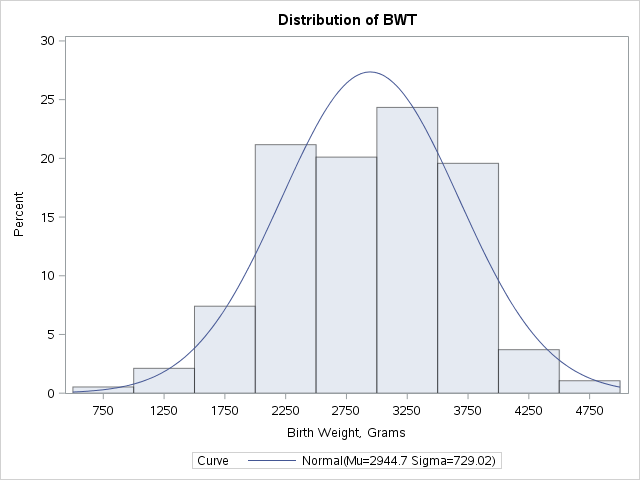
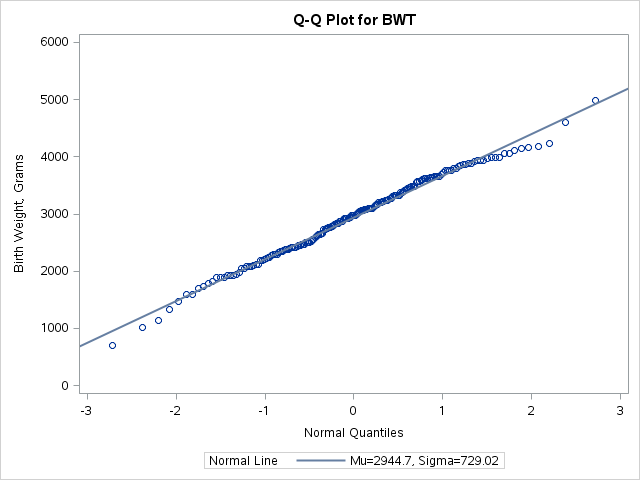

In [3]:
ods listing;
ods select basicmeasures histogram qqplot;
proc univariate data=work.birth;
   var bwt;
   histogram bwt / normal(mu=est sigma=est);
   qqplot bwt / normal(mu=est sigma=est);
run;

In [4]:
proc freq data=work.birth;
   table low smoke ht ptl;
run;


"So here I'm using `PROC MCMC`, which stands for *Markov Chain Monte Carlo*. We're working with the birth data set that we just ran in. I'm then specifying my parameters and priors, which is specific to Bayesian analysis. Again, I'm doing a logistic regression. And in my model, I'm specifying the variables smoke, hypertension, weight of the mother at the last menstrual period, and premature labor. So I'm only using four variables to try to predict when a baby is being born with a low birth weight. And of course, I could have added in the rest if I wanted as well. But let's run this procedure to get back some results."


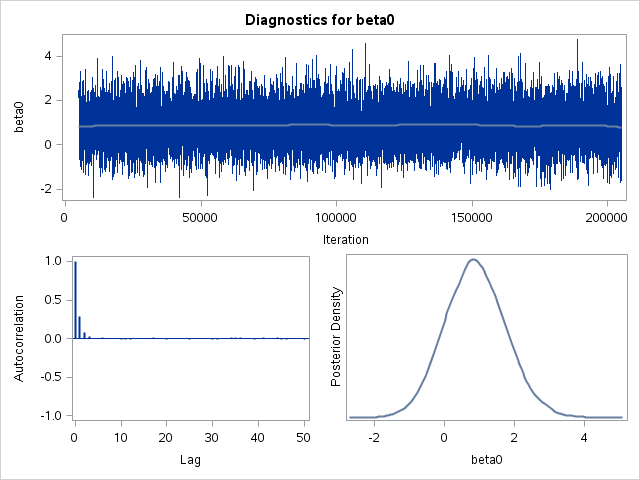
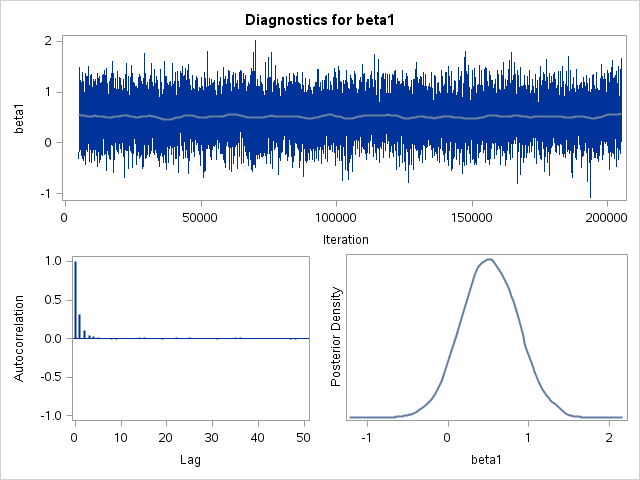
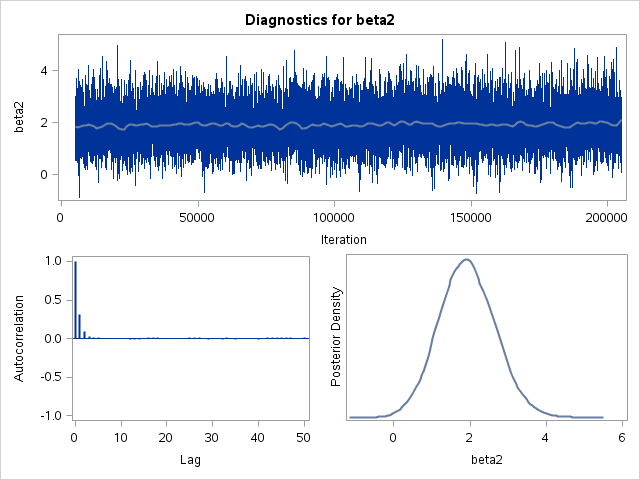
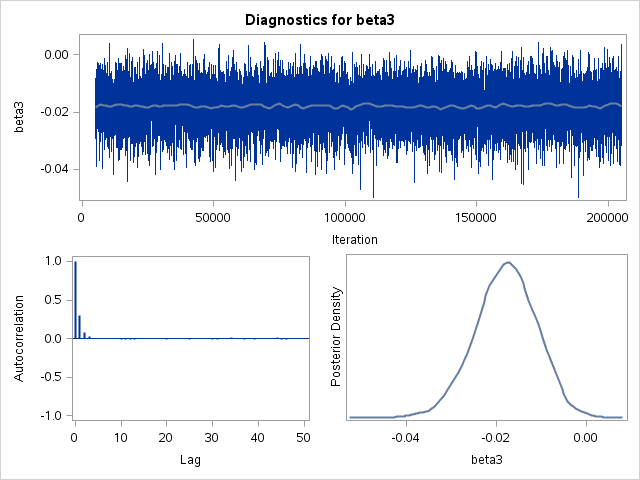
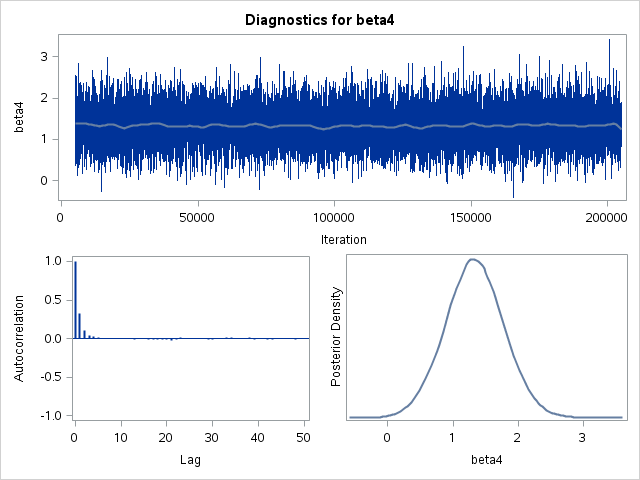

In [6]:
ods select nobs parameters postsummaries postintervals autocorr tadpanel;
proc mcmc data=work.birth outpost=birthout diag=all dic propcov=quanew 
   nbi=5000 ntu=5000 nmc=200000 thin=10 mchistory=brief plots(smooth)=all seed=27513 stats=all; 
   parms (beta0 beta1 beta2 beta3 beta4) 0; 
   prior beta: ~ normal(0, var=100); 
   p=logistic(beta0+beta1*smoke+beta2*ht+ beta3*lwt+beta4*ptl); 
   model low ~ binary(p); 
   title "Bayesian Analysis of Low Birth Weight Data"; 
run;
title;